# Libraries

In [5]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize



# Load Images

In [6]:
def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img = Image.open(os.path.join(folder_path, filename))
        if img is not None:
            images.append(img)
    return images

# Load Training Images 

In [7]:
Training_label_folder_dict = {
    "glioma": "PreProcesed_images/Trainning/glioma",
    "meningioma": "PreProcesed_images/Trainning/meningioma",
    "notumor": "PreProcesed_images/Trainning/notumor",
    "pituitary": "PreProcesed_images/Trainning/pituitary",
}
Training_label_images_dict = {}
for label, folder_path in Training_label_folder_dict.items():
    if os.path.isdir(folder_path):
        images = load_images_from_folder(folder_path)
        Training_label_images_dict[label] = images
    else:
        print(f"Folder path '{folder_path}' for label '{label}' does not exist.")
for label, images in Training_label_images_dict.items():
    print(f"Label: {label}, Number of images: {len(images)}")

Label: glioma, Number of images: 1321
Label: meningioma, Number of images: 1339
Label: notumor, Number of images: 1595
Label: pituitary, Number of images: 1457


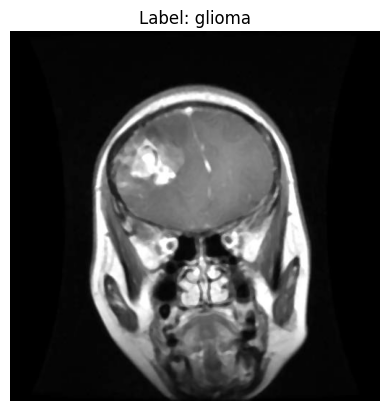

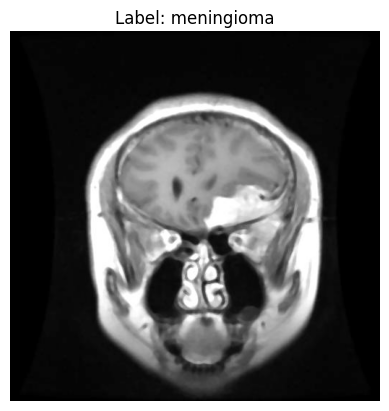

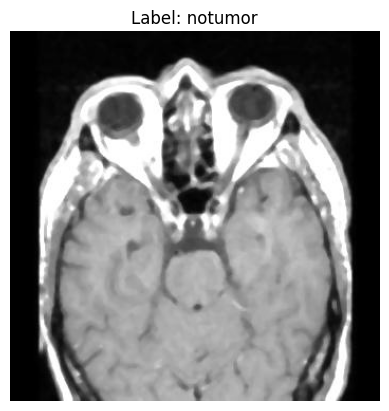

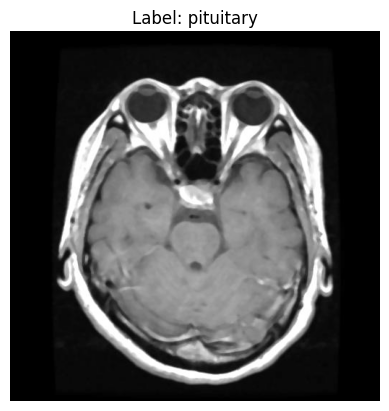

In [8]:
for label, images in Training_label_images_dict.items():
    if images:
        plt.figure()
        plt.imshow(images[0])  
        plt.title(f"Label: {label}")
        plt.axis('off')
        plt.show()
    else:
        print(f"No images found for label: {label}")

# Load Testing Data 

In [9]:
Testing_label_folder_dict = {
    "glioma": "Testing/glioma",
    "meningioma": "Testing/meningioma",
    "notumor": "Testing/notumor",
    "pituitary": "Testing/pituitary",
}
Testing_label_images_dict = {}
for label, folder_path in Testing_label_folder_dict.items():
    if os.path.isdir(folder_path):
        images = load_images_from_folder(folder_path)
        Testing_label_images_dict[label] = images
    else:
        print(f"Folder path '{folder_path}' for label '{label}' does not exist.")
for label, images in Testing_label_images_dict.items():
    print(f"Label: {label}, Number of images: {len(images)}")


Label: glioma, Number of images: 300
Label: meningioma, Number of images: 306
Label: notumor, Number of images: 405
Label: pituitary, Number of images: 300


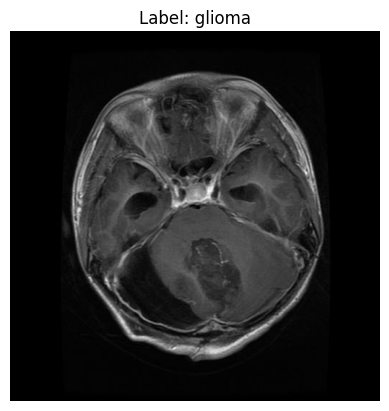

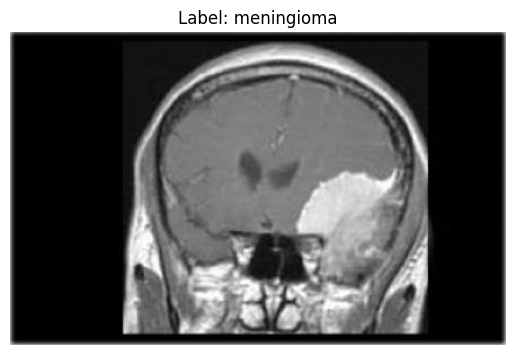

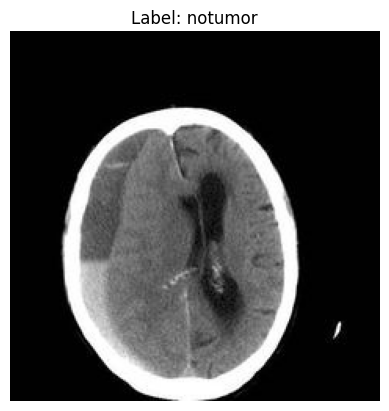

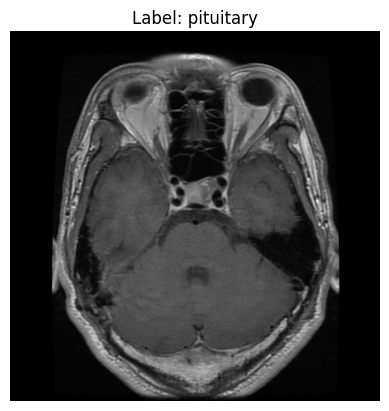

In [10]:
for label, images in Testing_label_images_dict.items():
    if images:
        plt.figure()
        plt.imshow(images[0])  
        plt.title(f"Label: {label}")
        plt.axis('off')
        plt.show()
    else:
        print(f"No images found for label: {label}")

# Creat CNN MOdel 

In [11]:
def create_cnn_model(input_shape):
    model = tf.keras.Sequential([      #  linear stack of array  bna deta h 
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),   # 3x3 size k 32 filers with input shape 
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(), # one dimensial array ma change kar deta h 
        tf.keras.layers.Dense(128, activation='relu'),   # use 128 nurons on FCNN
        tf.keras.layers.Dropout(0.5), # overfitting sa bachna k lia 30% newrons ko drop kar do 
        tf.keras.layers.Dense(4, activation='softmax')
    ])
    return model



# Reshape the images 

In [12]:
def preprocess_images(images, target_size=(32, 32)):
    preprocessed_images = []
    for image in images:
        resized_image = tf.image.resize(image, target_size)
        preprocessed_images.append(resized_image)
    return preprocessed_images

# Train the model 

In [13]:
def train_cnn_model(train_data):
    train_images = []
    train_labels = []
    for label, images in train_data.items():
        preprocessed_images = preprocess_images(images)
        train_images.extend(preprocessed_images)
        train_labels.extend([label] * len(preprocessed_images))      # images or Lbales ko separate kar na 
    
    # Convert lists to numpy arrays
    X_train = np.array(train_images, dtype=np.float32)
    label_encoder = LabelEncoder()                        # Assign label to very category 
    y_train_encoded = label_encoder.fit_transform(train_labels)
    y_train = np.array(y_train_encoded, dtype=np.int32)  

    max_height = max(img.shape[0] for img in train_images)
    max_width = max(img.shape[1] for img in train_images)
    channels = train_images[0].shape[2] if len(train_images) > 0 else 1
    input_shape = (max_height, max_width, channels)          
    
    # Create and compile CNN model
    model = create_cnn_model(input_shape)  
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=10, batch_size=32)
    
    return model


# Run the CNN Code

In [14]:

cnn_model = train_cnn_model(Training_label_images_dict)


c:\Users\mahma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.4450 - loss: 8.1471
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7110 - loss: 0.7077
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7678 - loss: 0.5970
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8104 - loss: 0.4909
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8227 - loss: 0.4654
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8597 - loss: 0.3666
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8690 - loss: 0.3241
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8609 - loss: 0.3546
Epoch 9/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8739 - loss: 0.3118
Epoch 10/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8924 - loss: 0.2838


# Evaluate the model 

In [15]:
def evaluate_cnn_model(model, eval_data):
    eval_images = []
    eval_labels = []
    for label, images in eval_data.items():
        preprocessed_images = preprocess_images(images)
        eval_images.extend(preprocessed_images)
        eval_labels.extend([label] * len(preprocessed_images))     # as with the same way separate the images and labels 
    
    # Convert lists to numpy arrays
    X_eval = np.array(eval_images, dtype=np.float32)  # Convert to float32
    label_encoder = LabelEncoder()
    y_eval_encoded = label_encoder.fit_transform(eval_labels)
    y_eval = np.array(y_eval_encoded, dtype=np.int32)   # Convert to int32
    loss, accuracy = model.evaluate(X_eval, y_eval)
    print("Evaluation Loss:", loss)
    print("Evaluation Accuracy:", accuracy)
    
    # Get predictions
    y_pred = np.argmax(model.predict(X_eval), axis=1)
    
    # Print classification report
    print("Classification Report:")
    print(classification_report(y_eval, y_pred))
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_eval, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    n_classes = len(np.unique(y_eval))
    y_eval_binarized = label_binarize(y_eval, classes=np.unique(y_eval))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    y_pred_proba = model.predict(X_eval)  # Predict probabilities
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_eval_binarized[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    # Plot Precision-Recall curve
    plt.figure(figsize=(8, 6))
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_eval_binarized[:, i], y_pred_proba[:, i])
        average_precision[i] = average_precision_score(y_eval_binarized[:, i], y_pred_proba[:, i])

    for i in range(n_classes):
        plt.plot(recall[i], precision[i], lw=2, label='Precision-recall curve (AP = %0.2f) for class %d' % (average_precision[i], i))

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve')
    plt.legend(loc="lower right")
    plt.show()


# Run Evaluation 

179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8629 - loss: 0.3119
Evaluation Loss: 0.1895209103822708
Evaluation Accuracy: 0.9268207550048828
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      1321
           1       0.84      0.88      0.86      1339
           2       0.95      0.99      0.97      1595
           3       0.94      0.98      0.96      1457

    accuracy                           0.93      5712
   macro avg       0.93      0.92      0.92      5712
weighted avg       0.93      0.93      0.93      5712



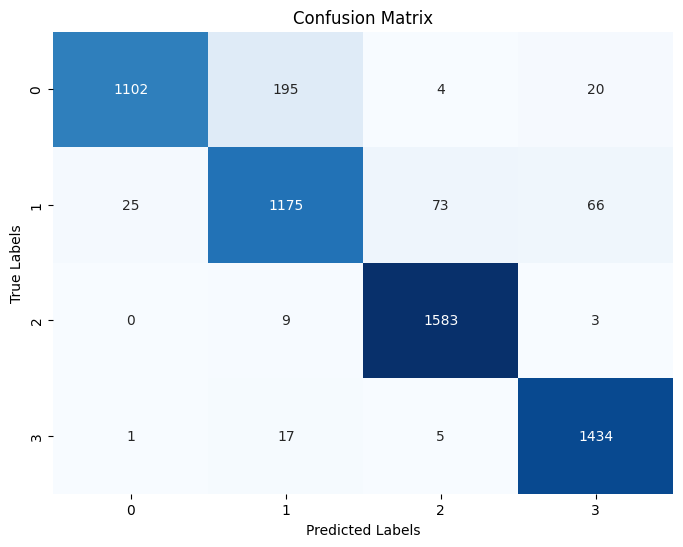

179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


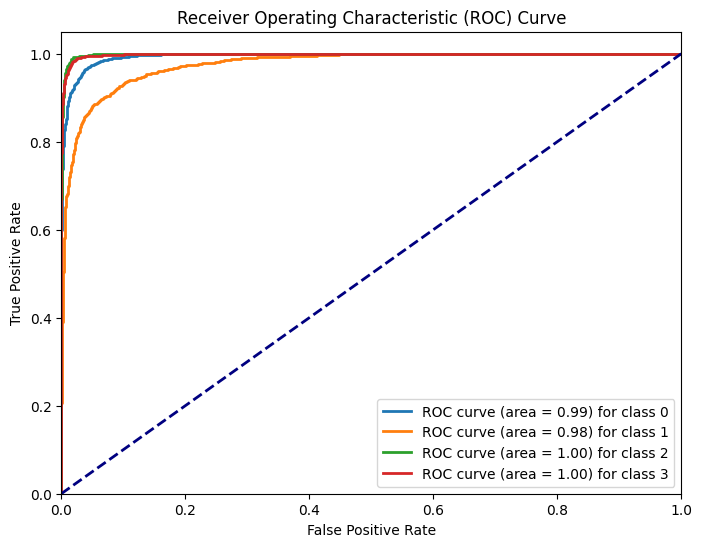

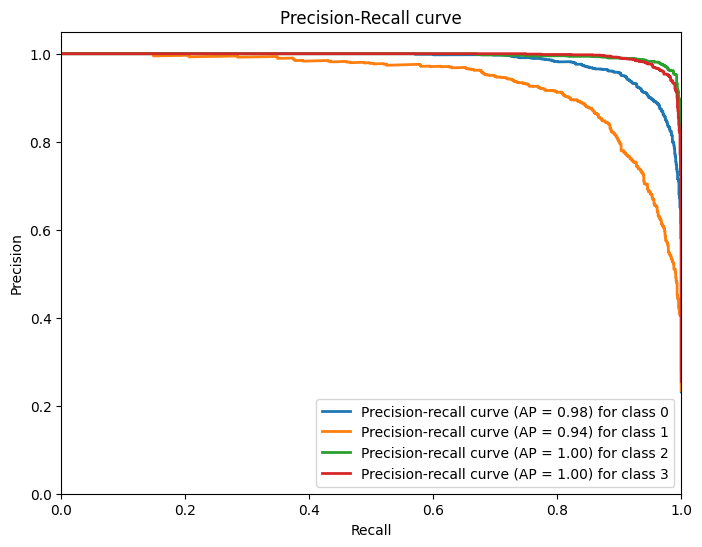

In [16]:

evaluate_cnn_model(cnn_model, Training_label_images_dict)